# 강남 3구는 안전한가?
- 강남 3구의 주민들이 자신들이 거주하는 구의 체감 안전도를 높게 생각한다는 기사를 확인해 보도록 한다

### 데이터 정리하기
- 필요한 모듈 작성

In [1]:
import numpy as np
import pandas as pd

In [2]:
crime_anal_police = pd.read_csv('crime_in_Seoul.csv', thousands=',', encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [3]:
# 시각화를 위한 import setting
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [4]:
url = 'https://www.police.go.kr/user/bbs/BD_selectBbsList.do?q_bbsCode=1038&q_tab=1'
html=urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
pol_list = []
pol_data = soup.find_all('tr')
for pol in pol_data[2:]:
    name=pol.find_all('td')[0].text
    address=pol.find_all('td')[1].text.strip()
    pol_list.append([name,address])
pol_list

[['서울강남경찰서', '서울시 강남구 테헤란로 114길 11'],
 ['서울강동경찰서', '서울시 강동구 성내로 57'],
 ['서울강북경찰서', '서울시 강북구 오패산로 406'],
 ['서울강서경찰서', '서울시 양천구 화곡로 73'],
 ['서울관악경찰서', '서울시 관악구 관악로5길 33'],
 ['서울광진경찰서', '서울시 광진구 자양로 167'],
 ['서울구로경찰서', '서울시 구로구 가마산로 235'],
 ['서울금천경찰서', '서울시 금천구 시흥대로73길 50'],
 ['서울남대문경찰서', '서울시 중구 한강대로 410'],
 ['서울노원경찰서', '서울시 노원구 노원로 283'],
 ['서울도봉경찰서', '서울시 도봉구 노해로 403'],
 ['서울동대문경찰서', '서울시 동대문구 약령시로21길 29'],
 ['서울동작경찰서', '서울시 동작구 노량진로 148'],
 ['서울마포경찰서', '서울시 마포구 마포대로 183'],
 ['서울방배경찰서', '서울시 서초구 동작대로 204'],
 ['서울서대문경찰서', '서울 서대문구 통일로 113'],
 ['서울서부경찰서', '서울시 은평구 진흥로 58'],
 ['서울서초경찰서', '서울시 서초구 반포대로 179'],
 ['서울성동경찰서', '서울시 성동구 왕십리광장로 9'],
 ['서울성북경찰서', '서울 성북구 보문로 170'],
 ['서울송파경찰서', '서울시 송파구 중대로 221'],
 ['서울수서경찰서', '서울시 강남구 개포로 617'],
 ['서울양천경찰서', '서울시 양천구 목동동로 99'],
 ['서울영등포경찰서', '서울시 영등포구 국회대로 608'],
 ['서울용산경찰서', '서울시 용산구 원효로89길 24'],
 ['서울은평경찰서', '서울시 은평구 연서로 365'],
 ['서울종로경찰서', '서울시 종로구 율곡로 46'],
 ['서울종암경찰서', '서울시 성북구 종암로 135'],
 ['서울중랑경찰서', '서울시 중랑구 신내역로3길 40-10'],
 ['서울중부경찰서', '서

In [5]:
pol_df = pd.DataFrame(pol_list, columns=['경찰서명','주소'])
pol_df['관서명'] = pol_df.경찰서명.str[2:-3]+'서'
pol_df['구별'] = pol_df.주소.apply(lambda x: x.split(' ')[1])
pol_df

,경찰서명,주소,관서명,구별
0,서울강남경찰서,서울시 강남구 테헤란로 114길 11,강남서,강남구
1,서울강동경찰서,서울시 강동구 성내로 57,강동서,강동구
2,서울강북경찰서,서울시 강북구 오패산로 406,강북서,강북구
3,서울강서경찰서,서울시 양천구 화곡로 73,강서서,양천구
4,서울관악경찰서,서울시 관악구 관악로5길 33,관악서,관악구
5,서울광진경찰서,서울시 광진구 자양로 167,광진서,광진구
6,서울구로경찰서,서울시 구로구 가마산로 235,구로서,구로구
7,서울금천경찰서,서울시 금천구 시흥대로73길 50,금천서,금천구
8,서울남대문경찰서,서울시 중구 한강대로 410,남대문서,중구
9,서울노원경찰서,서울시 노원구 노원로 283,노원서,노원구


In [6]:
crime_anal_police = pd.merge(crime_anal_police, pol_df[['관서명','구별']],how='left',on='관서명')
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [7]:
crime_anal_police.to_csv('crime_in_Seoul_include_gu_name_csv', index=False, header=True,
                        sep=',',encoding='utf-8-sig')

In [8]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [9]:
crime_anal_raw = pd.read_csv('crime_in_Seoul_include_gu_name_csv')
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [10]:
crime_anal_raw = pd.read_csv('crime_in_Seoul_include_gu_name_csv', index_col=0)
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723
도봉구,106,102,10,9,3,3,478,1063,1303,1487


In [11]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [12]:
# 추가) 강력사건은 어떤 곳이 많이 발생하고 검거율은 어떤지?
# 강력사건을 정의 : 강간 + 살인 => 강력사건
# 강력사건발생 건수와 비율 생성
# 두 사건을 결합한 것이 강력사건이고 검거율도 두사건을 합친걸로 반영
con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column]>100,column] = 100
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [13]:
crime_anal.rename(columns={'강간 발생':'강간',
                           '강도 발생':'강도',
                           '살인 발생':'살인',
                           '절도 발생':'절도',
                           '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [14]:
# 사이킷런
from sklearn import preprocessing

In [15]:
# 정규화
# 범죄 발생 절대건수를 비교하기 위해 컬럼별로 정규화 시킨다

col=['강간','강도','살인','절도','폭력']
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [16]:
result_CCTV = pd.read_csv('01. CCTV_result.csv', index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [17]:
col=['강간','강도','살인','절도','폭력']
# 발생건수를 범죄로 정규화해서 합치기
# 경범죄와 중범죄로 나눈다면? 절도와 폭력은 경범죄로 하고, 강간과 강도는 중범죄로 분리한다면...
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [18]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


In [19]:
# 경범죄와, 중범죄 나눌수 있으면 좋겠다.
col = ['절도', '폭력']
crime_anal_norm['경범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,경범죄
구별,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384,1.614858
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431,0.735441
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540,0.401694
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261,0.990327
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211,0.940665
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079,0.794592
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929,0.306500
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292,0.678857
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167,0.000000


In [20]:
col = ['강간','강도','살인']
crime_anal_norm['중범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,경범죄,중범죄
구별,,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384,1.614858,2.857843
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431,0.735441,0.381110
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540,0.401694,1.093052
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261,0.990327,1.623340
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211,0.940665,1.093773


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
crime_anal_norm['CCTV그룹'] = crime_anal_norm['CCTV']//100
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,경범죄,중범죄,CCTV그룹
구별,,,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384,1.614858,2.857843,27
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431,0.735441,0.381110,7
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540,0.401694,1.093052,7
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261,0.990327,1.623340,14
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211,0.940665,1.093773,7


<AxesSubplot:xlabel='경범죄', ylabel='중범죄'>

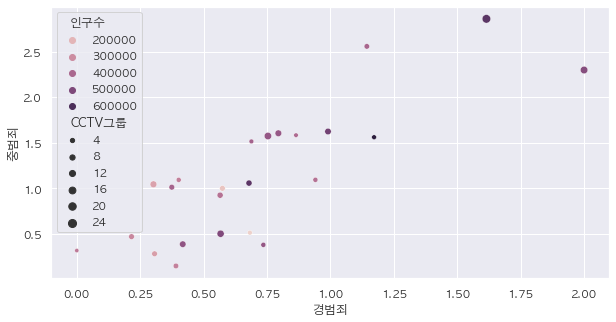

In [23]:
# CCTV수에 따른 경범죄, 중범죄 비율
# 인구수에 따른 경범죄, 중범죄 비율
# CCTV수에 따른 검거율
sns.set(font="AppleGothic",rc={"axes.unicode_minus":False})
fig = plt.figure(figsize=(10,5))
sns.scatterplot(x=crime_anal_norm['경범죄'],y=crime_anal_norm['중범죄'],hue=crime_anal_norm['인구수'],size=crime_anal_norm['CCTV그룹'])

<AxesSubplot:xlabel='인구수', ylabel='중범죄'>

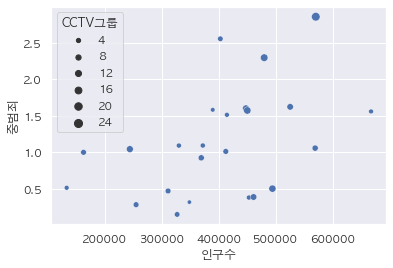

In [24]:
sns.scatterplot(x=crime_anal_norm['인구수'],y=crime_anal_norm['중범죄'],size=crime_anal_norm['CCTV그룹'])

<AxesSubplot:xlabel='인구수', ylabel='경범죄'>

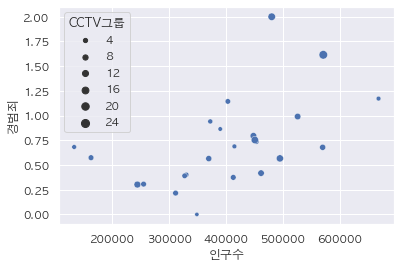

In [25]:
sns.scatterplot(x=crime_anal_norm['인구수'],y=crime_anal_norm['경범죄'],size=crime_anal_norm['CCTV그룹'])

<AxesSubplot:xlabel='CCTV', ylabel='검거'>

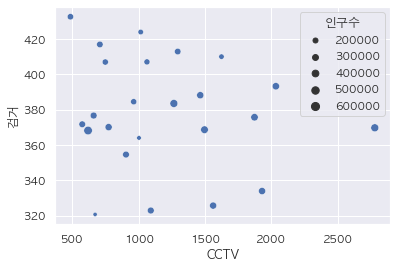

In [26]:
sns.scatterplot(x=crime_anal_norm['CCTV'],y=crime_anal_norm['검거'],size=crime_anal_norm['인구수'])

<AxesSubplot:xlabel='CCTV', ylabel='경범죄'>

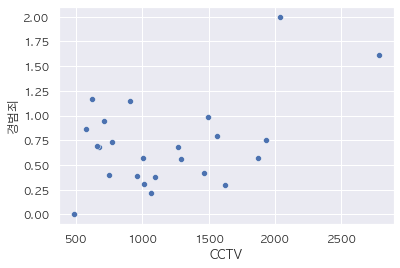

In [27]:
sns.scatterplot(x=crime_anal_norm['CCTV'],y=crime_anal_norm['경범죄'])

<AxesSubplot:xlabel='CCTV', ylabel='중범죄'>

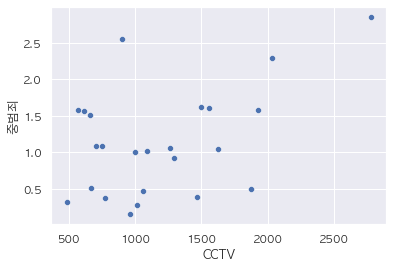

In [28]:
sns.scatterplot(x=crime_anal_norm['CCTV'],y=crime_anal_norm['중범죄'])

In [29]:
np.corrcoef(crime_anal_norm['CCTV'],crime_anal_norm['중범죄'])

array([[1.        , 0.45028538],
       [0.45028538, 1.        ]])

In [30]:
np.corrcoef(crime_anal_norm['CCTV'],crime_anal_norm['경범죄'])

array([[1.        , 0.45271207],
       [0.45271207, 1.        ]])

In [31]:
np.corrcoef(crime_anal_norm['CCTV'],crime_anal_norm['검거'])

array([[ 1.       , -0.1491114],
       [-0.1491114,  1.       ]])

In [32]:
np.corrcoef(crime_anal_norm['경범죄'],crime_anal_norm['중범죄'])

array([[1.       , 0.8158508],
       [0.8158508, 1.       ]])

In [33]:
np.corrcoef(crime_anal_norm['인구수'],crime_anal_norm['범죄'])

array([[1.        , 0.49995942],
       [0.49995942, 1.        ]])

- 인구수가 많으면 범죄가 많다. (높은 상관계수)
- 경범죄가 많은곳에는 중범죄도 많다. (매우높은 상관계수)
- 범죄가 많으면 CCTV도 수가 늘어가지만 검거는 이루어지는데 상관이 없는것 같다.(CCTV로 확인을 해도 검거는 다른곳에서 이루어질 경우가 있어서 상관없이 보이는걸로 예상됨)

In [34]:
np.corrcoef(crime_anal_norm['CCTV'],crime_anal_norm['강간'])

array([[1.        , 0.62982516],
       [0.62982516, 1.        ]])

In [35]:
np.corrcoef(crime_anal_norm['인구수'],crime_anal_norm['절도'])

array([[1.        , 0.48012928],
       [0.48012928, 1.        ]])

In [36]:
np.corrcoef(crime_anal_norm['인구수'],crime_anal_norm['폭력'])

array([[1.        , 0.51380073],
       [0.51380073, 1.        ]])

In [37]:
np.corrcoef(crime_anal_norm['인구수'],crime_anal_norm['강도'])

array([[1.        , 0.20103479],
       [0.20103479, 1.        ]])

In [38]:
np.corrcoef(crime_anal_norm['인구수'],crime_anal_norm['살인'])

array([[1.        , 0.55598633],
       [0.55598633, 1.        ]])

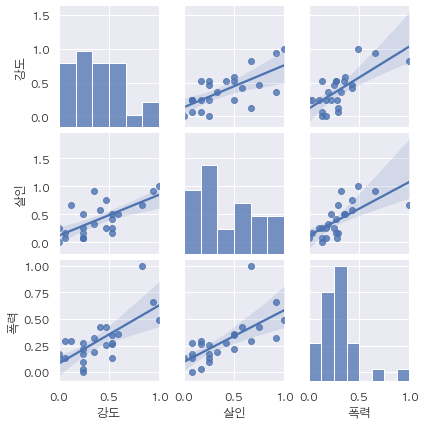

In [40]:
sns.pairplot(crime_anal_norm, vars=['강도','살인','폭력'],kind='reg',height=2)
plt.show()

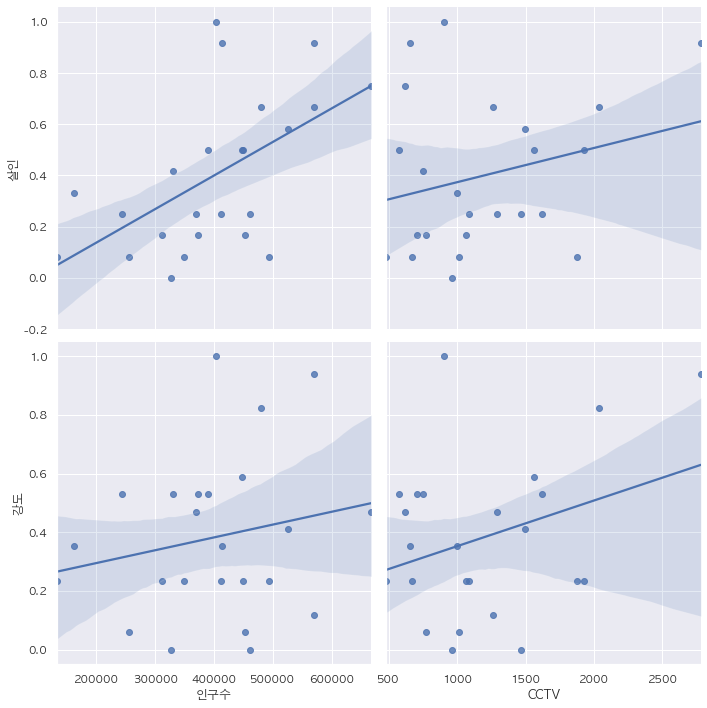

In [42]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'], y_vars=['살인','강도'],kind='reg',height=5)
plt.show()

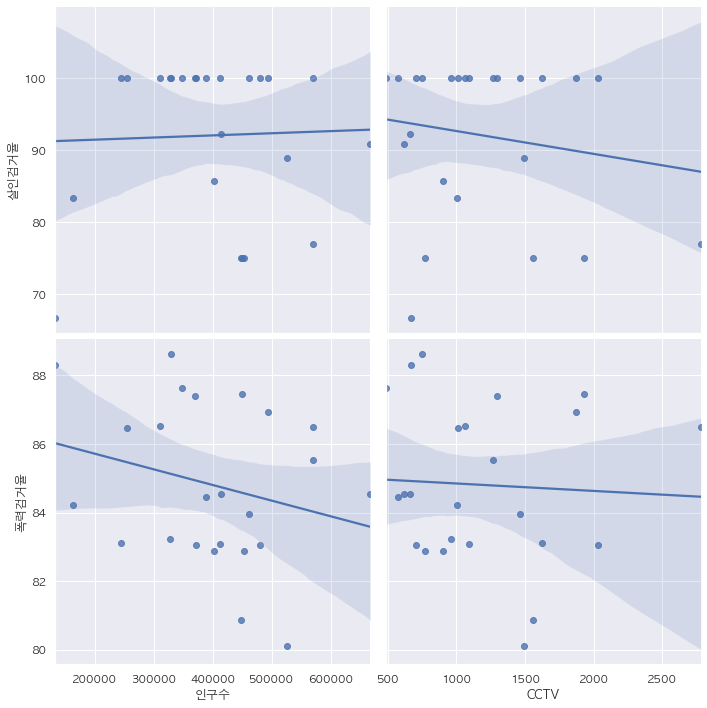

In [44]:
sns.pairplot(crime_anal_norm,x_vars=['인구수','CCTV'],y_vars=['살인검거율','폭력검거율'],kind='reg',height=5)
plt.show()

In [46]:
tmp_max=crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max*100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,경범죄,중범죄,CCTV그룹
구별,,,,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000,0.000000,0.318627,4
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139,0.306500,0.283367,10
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820,0.940665,1.093773,7
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250,0.564948,0.925199,12
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790,0.302133,1.044541,16


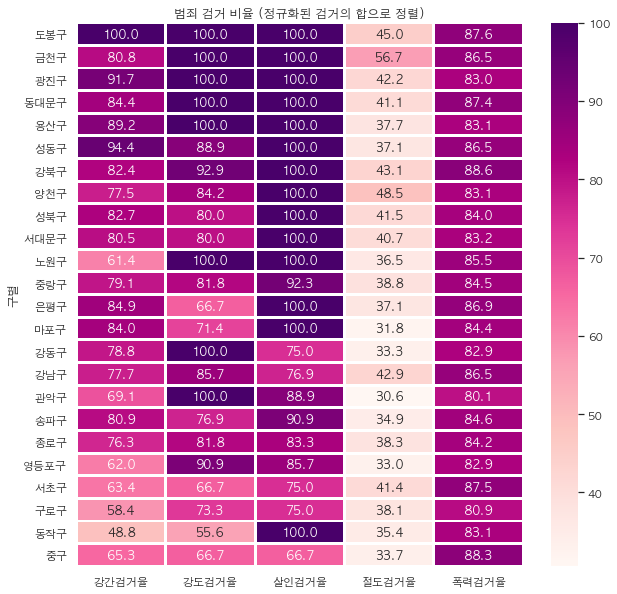

In [48]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='.1f', linewidths=2,cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [49]:
np.corrcoef(crime_anal_norm['CCTV'],crime_anal_norm['검거'])

array([[ 1.       , -0.1491114],
       [-0.1491114,  1.       ]])

In [51]:
crime_anal_norm.to_csv('crime_in_Seoul_final.csv',sep=',',index=False,header=True, encoding='utf-8')

# 지도 시각화

In [52]:
import folium

In [53]:
stamen = folium.Map(location=[45.5236,-122.6750],zoom_start=13)
stamen

In [54]:
stamen = folium.Map(location=[45.5236,-122.6750],tiles='Stamen Toner',zoom_start=13)
stamen

In [58]:
map_1 = folium.Map(location=[45.372,-121.6972],zoom_start=12,tiles='Stamen Terrain')
folium.Marker([45.3288,-121.6625],popup='Mt. Hood Meadows', icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3288,-121.7113],popup='Timberline Lodge', icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3288,-121.6823],popup='Some Other Location', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)
map_1

In [59]:
map_2 = folium.Map(location=[45.5236,-122.6750],tiles='Stamen Toner', zoom_start=13)
folium.Marker([45.5244,-122.6699],popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5215,-122.6261],radius=50,popup='Laurelhurst Park',color='#3186cc',fill_color='#3186cc',).add_to(map_2)
map_2

In [60]:
import json
import folium

In [61]:
# json 불러오기
geo_path='02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

In [ ]:
m = folium.Map(location=[37.5502,126.982],zoom_start=11,tiles='Stamen Toner')
folium.Choropleth

# 시계열 데이터를 다루어서 분석하기

In [4]:
# import warnings
# warnings.filterwarnings('ignore')
# conda install -c conda-forge prophet (터미널에 설치)
!pip install plotly

     |████████████████████████████████| 23.9 MB 4.5 MB/s eta 0:00:011


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
import plotly
from datetime import datetime

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
ts = pd.read_csv('Time series data.csv', encoding='utf-8',thousands=',',names=['date','hit'],index_col=0)
ts = ts[ts['hit'].notnull()]
ts.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


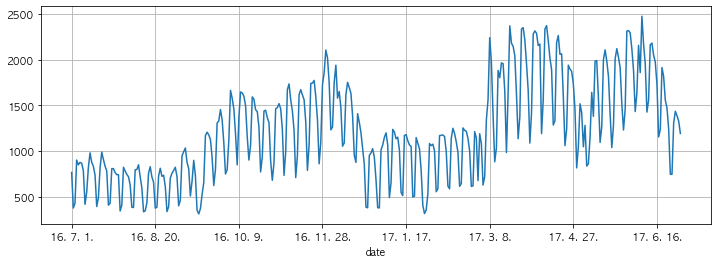

In [10]:
ts['hit'].plot(figsize=(12,4),grid=True);

In [12]:
df = pd.DataFrame({'ds':ts.index,'y':ts['hit']})
df.reset_index(inplace=True)
df['ds']=pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [15]:
# 기간을 60일을 기준으로 미래를 예측하는 것을 만들어 보고싶다.
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [16]:
# 예측한 데이터를 forecast변수에 저장
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,900.611910,681.541834,1108.750493
421,2017-08-26,485.482790,273.743005,697.318439
422,2017-08-27,618.155087,399.621539,838.710422
423,2017-08-28,1170.989096,954.810075,1397.999819
424,2017-08-29,1207.006811,1003.613639,1413.236883


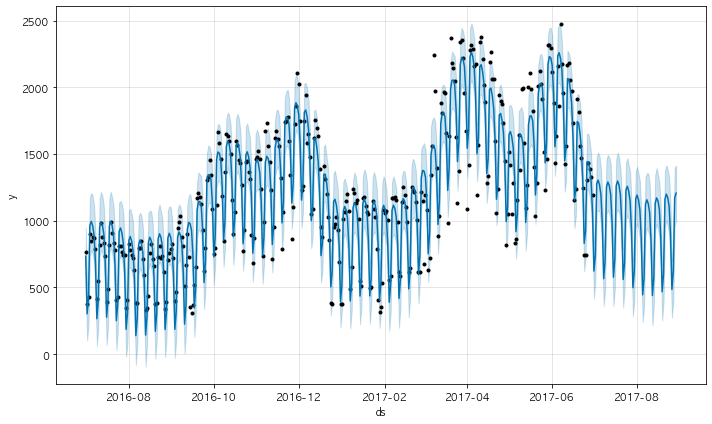

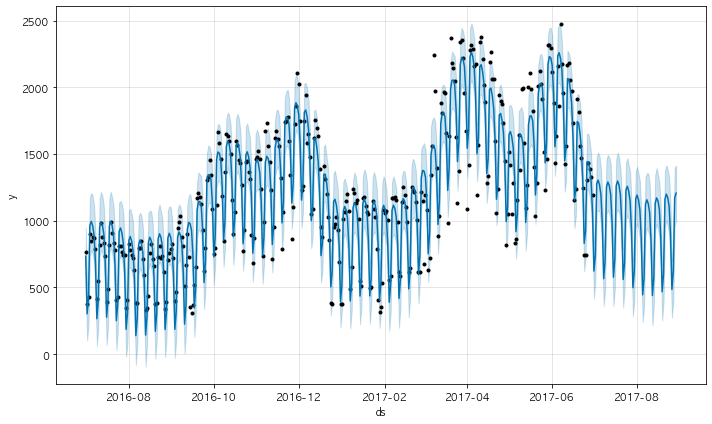

In [17]:
# 예측한 값을 시각화로 표현
m.plot(forecast)

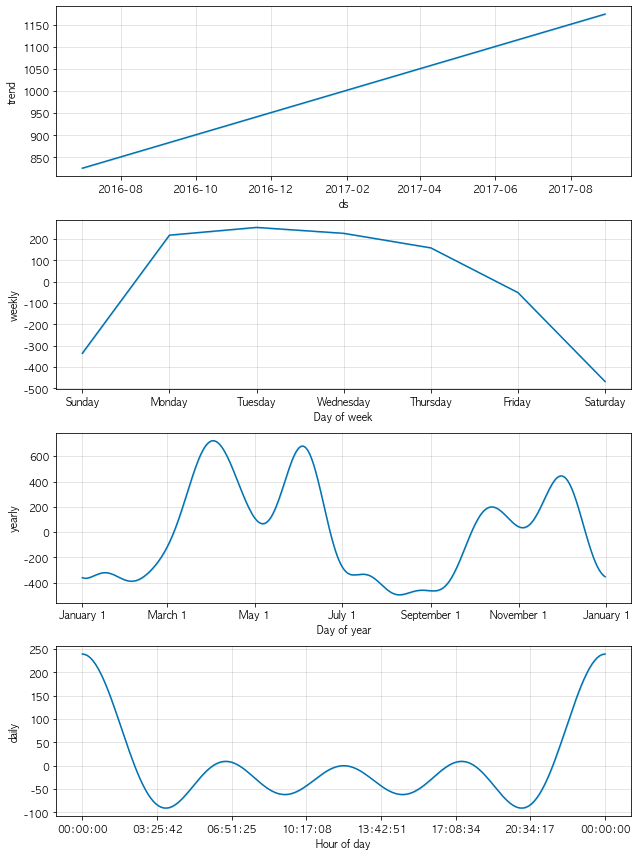

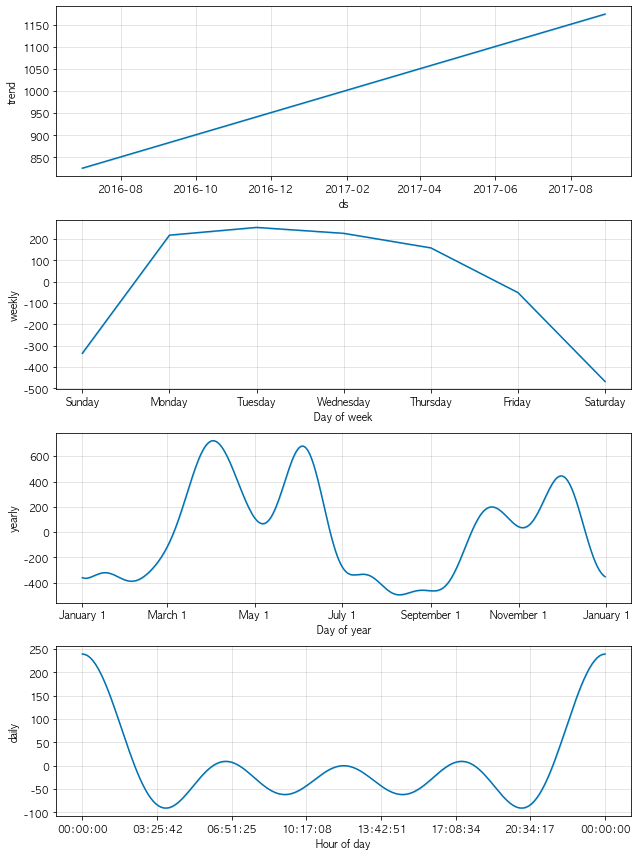

In [18]:
m.plot_components(forecast)